In [1]:
# imports
import h2o 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.kmeans import H2OKMeansEstimator
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# display matplotlib graphics in notebook
%matplotlib inline

## Generate Combined Dataset

In [3]:
train = pd.read_csv('assign_05_train.csv')

In [4]:
len(train)

64122

In [5]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /Users/wangqiang/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/10/dfx57bd95ll57r0vg1r3bgfm0000gn/T/tmpyjod450o
  JVM stdout: /var/folders/10/dfx57bd95ll57r0vg1r3bgfm0000gn/T/tmpyjod450o/h2o_Carol_started_from_python.out
  JVM stderr: /var/folders/10/dfx57bd95ll57r0vg1r3bgfm0000gn/T/tmpyjod450o/h2o_Carol_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,3 months and 8 days
H2O cluster name:,H2O_from_python_Carol_oe3xc4
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [6]:
col_types = {
    'chain':'enum',
    'offer':'enum',
    'market':'enum',
    'category':'enum',
    'company':'enum',
    'brand':'enum',
    'exact_item_bought':'enum',
    'offerdate':'time',
    'month':'enum',
    'week':'enum'
}

In [7]:
train_h2o = h2o.H2OFrame(train, column_types=col_types)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
train_h2o.describe()

Rows:64122
Cols:18




,id,chain,offer,market,repeater,offerdate,category,quantity,company,offervalue,brand,avg_category_quantity,avg_category_amount,exact_item_bought,month,week,dayOfWeek,day
type,int,enum,enum,enum,int,time,enum,int,enum,real,enum,real,real,enum,enum,enum,enum,int
mins,86246.0,,,,0.0,1362096000000.0,,1.0,,0.75,,-1.0,-85.14,,,,,1.0
mean,1865046990.705776,,,,0.2693771248557437,1365226057677.55,,1.0,,1.2553569757649448,,0.6942286652420019,2.2440281205381485,,,,,19.029849349677214
maxs,4809911000.0,,,,1.0,1367280000000.0,,1.0,,3.0,,44.181818182,60.802,,,,,31.0
sigma,1567329467.998472,,,,0.4436396723261261,1304850779.3858106,,0.0,,0.5238038613432828,,0.7714497289290293,2.6319680001789543,,,,,9.628506814875887
zeros,0,,,,46849,0,,0,,0,,29124,29138,,,,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,86246.0,205,1208251,34,1.0,2013-04-24 00:00:00,2202,1.0,104460040,2.0,3718,0.0,0.0,0,4,17,Wed,24.0
1,12682470.0,18,unknown,11,0.0,2013-03-28 00:00:00,unknown,1.0,unknown,0.75,unknown,1.0,2.5,1,3,13,Thu,28.0
2,13807224.0,4,1204576,1,0.0,2013-04-05 00:00:00,5616,1.0,104610040,1.0,15889,1.4375,3.365,1,4,14,Fri,5.0


In [9]:
X = ['offervalue','avg_category_quantity','avg_category_amount','exact_item_bought','month','week','day']

In [10]:
train_h2o.types.items()

dict_items([('id', 'int'), ('chain', 'enum'), ('offer', 'enum'), ('market', 'enum'), ('repeater', 'int'), ('offerdate', 'time'), ('category', 'enum'), ('quantity', 'int'), ('company', 'enum'), ('offervalue', 'real'), ('brand', 'enum'), ('avg_category_quantity', 'real'), ('avg_category_amount', 'real'), ('exact_item_bought', 'enum'), ('month', 'enum'), ('week', 'enum'), ('dayOfWeek', 'enum'), ('day', 'int')])

In [11]:
train_h2o.describe()

Rows:64122
Cols:18




,id,chain,offer,market,repeater,offerdate,category,quantity,company,offervalue,brand,avg_category_quantity,avg_category_amount,exact_item_bought,month,week,dayOfWeek,day
type,int,enum,enum,enum,int,time,enum,int,enum,real,enum,real,real,enum,enum,enum,enum,int
mins,86246.0,,,,0.0,1362096000000.0,,1.0,,0.75,,-1.0,-85.14,,,,,1.0
mean,1865046990.705776,,,,0.2693771248557437,1365226057677.55,,1.0,,1.2553569757649448,,0.6942286652420019,2.2440281205381485,,,,,19.029849349677214
maxs,4809911000.0,,,,1.0,1367280000000.0,,1.0,,3.0,,44.181818182,60.802,,,,,31.0
sigma,1567329467.998472,,,,0.4436396723261261,1304850779.3858106,,0.0,,0.5238038613432828,,0.7714497289290293,2.6319680001789543,,,,,9.628506814875887
zeros,0,,,,46849,0,,0,,0,,29124,29138,,,,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,86246.0,205,1208251,34,1.0,2013-04-24 00:00:00,2202,1.0,104460040,2.0,3718,0.0,0.0,0,4,17,Wed,24.0
1,12682470.0,18,unknown,11,0.0,2013-03-28 00:00:00,unknown,1.0,unknown,0.75,unknown,1.0,2.5,1,3,13,Thu,28.0
2,13807224.0,4,1204576,1,0.0,2013-04-05 00:00:00,5616,1.0,104610040,1.0,15889,1.4375,3.365,1,4,14,Fri,5.0


## 1. Plot of the first 3 principal components with outliers

In [12]:
def plot(_3d_labeled_frame):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    _0 = ax.scatter(features_pandas.loc[:,'PC1'],
                     features_pandas.loc[:,'PC2'],
                     (-1)*features_pandas.loc[:,'PC3'],
                     color='m', marker='o', alpha=.15)

   
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.set_xlim3d(20,-60)
    ax.set_ylim3d(-5,15)
    ax.set_zlim3d(4,-3)
    ax.view_init(None,100)

pca Model Build progress: |███████████████████████████████████████████████| 100%


/Users/wangqiang/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: _train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language.
  warnings.warn(w)


pca prediction progress: |████████████████████████████████████████████████| 100%


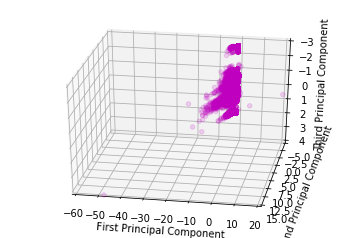

In [13]:
# project training data onto 3-D using principal components
pca = H2OPrincipalComponentAnalysisEstimator(transform='standardize',seed=12345,k=3) #project onto 3 PCS
pca.train(x = X,training_frame = train_h2o)
features = pca.predict(train_h2o)
features_pandas = features.as_data_frame()
plot(features_pandas)

The plot detects two outliers, that is PC3 >3

In [14]:
features_pandas[(features_pandas.PC1 > 10)|(features_pandas.PC1 <-40)]

,PC1,PC2,PC3
2903,18.688765,-6.892467,-1.009567
21276,-46.475067,16.516525,-3.785917


In [15]:
features_pandas= features_pandas[(features_pandas.PC1 < 10)&(features_pandas.PC1 >-40)]

In [16]:
len(features_pandas)

64120

## 2.Plot of the first 3 principal components without outliers

In [17]:
def plot(_3d_labeled_frame):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    _0 = ax.scatter(features_pandas.loc[:,'PC1'],
                     features_pandas.loc[:,'PC2'],
                     (-1)*features_pandas.loc[:,'PC3'],
                     color='m', marker='o', alpha=.15)

   
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.set_xlim3d(4,-20)
    ax.set_ylim3d(5,-2)
    ax.set_zlim3d(-5,3)
    ax.view_init(None,100)

## Determine the number of clusters:

We detect two ouliers, the index of which are 2903 and 21276. Outlier should be removed and new dataset should be upload into h2o dataframe again

In [18]:
len(train)

64122

In [19]:
outlier = train.iloc[[2903,21276],:]

In [20]:
train_no_outlier = pd.merge(train,outlier,how = 'outer',indicator = True).query('_merge == "left_only"').drop(columns=['_merge'])

In [21]:
train_h2o = h2o.H2OFrame(train_no_outlier, column_types=col_types)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
len(train_h2o)

64120

pca Model Build progress: |███████████████████████████████████████████████| 100%


/Users/wangqiang/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: _train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language.
  warnings.warn(w)


pca prediction progress: |████████████████████████████████████████████████| 100%


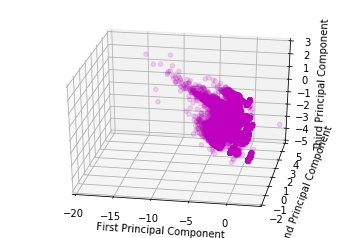

In [23]:
# project training data onto 3-D using principal components
pca = H2OPrincipalComponentAnalysisEstimator(transform='standardize',seed=12345,k=3) #project onto 3 PCS
pca.train(x = X,training_frame = train_h2o)
features = pca.predict(train_h2o)
features_pandas = features.as_data_frame()
plot(features_pandas)

NO OUTLIERS in new train H2O dataset

train k-means cluster model for k =1 to k=10

In [24]:
dt = {}
dt['error']=[]
for i in range(1,11):
    clusters = H2OKMeansEstimator(standardize=True, k=i, seed=12345)
    clusters.train(x=X, training_frame = train_h2o)
    dt['error'].append(clusters.tot_withinss())

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [25]:
dt['k']=[x for x in range(1,11)]

In [26]:
dt

{'error': [360507.0007653067,
  235836.49810827503,
  192975.7015638892,
  170752.7992912954,
  124357.85712589504,
  130815.16831998603,
  112370.35157767554,
  98733.6329711051,
  96528.19510393245,
  93638.60003574676],
 'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [27]:
error = pd.DataFrame(dt)

In [28]:
error

,error,k
0,360507.000765,1
1,235836.498108,2
2,192975.701564,3
3,170752.799291,4
4,124357.857126,5
5,130815.168320,6
6,112370.351578,7
7,98733.632971,8
8,96528.195104,9
9,93638.600036,10


## 3. Plot of k vs. total in-cluster error

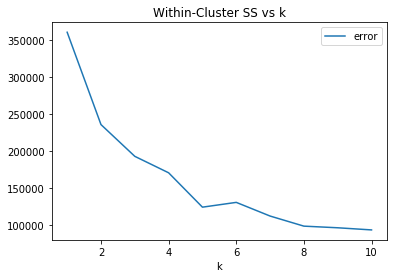

In [29]:
plt.plot(error.k,error.error)
plt.title('Within-Cluster SS vs k')
plt.xlabel('k')
plt.legend()

Based on the plot of total within-cluster error vs. the number of clusters, the curve flattens out at lag 5.

## Confirm the number of clusters:

In [30]:
clusters = H2OKMeansEstimator(standardize=True, k=5, seed=12345)
clusters.train(x=X, training_frame=train_h2o)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [31]:
# join cluster labels to original data for further analysis
labels = clusters.predict(train_h2o)
labeled_train_h2o =  train_h2o.cbind(labels)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [32]:
# output the predict column
labeled_train_h2o[-1].head(15)

predict
0
4
3
3
3
0
4
3
4
1


In [33]:
def plot(_3d_labeled_frame):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    _0 = ax.scatter(features_pandas[_3d_labeled_frame.label == 0].loc[:, 'PC1'], 
                     features_pandas[_3d_labeled_frame.label == 0].loc[:, 'PC2'],
                     features_pandas[_3d_labeled_frame.label == 0].loc[:, 'PC3'],
                     color='c', marker='^', alpha=.15)

    _1 = ax.scatter(features_pandas[_3d_labeled_frame.label == 1].loc[:, 'PC1'], 
                     features_pandas[_3d_labeled_frame.label == 1].loc[:, 'PC2'],
                     features_pandas[_3d_labeled_frame.label == 1].loc[:, 'PC3'],
                     color='r', alpha=.15)

    _2 = ax.scatter(features_pandas[_3d_labeled_frame.label == 2].loc[:, 'PC1'], 
                     features_pandas[_3d_labeled_frame.label == 2].loc[:, 'PC2'],
                     features_pandas[_3d_labeled_frame.label == 2].loc[:, 'PC3'],
                     color='m', marker='s', alpha=.15)   
    
    _3 = ax.scatter(features_pandas[_3d_labeled_frame.label == 3].loc[:, 'PC1'], 
                     features_pandas[_3d_labeled_frame.label == 3].loc[:, 'PC2'],
                     features_pandas[_3d_labeled_frame.label == 3].loc[:, 'PC3'],
                     color='b', marker='o', alpha=.15)    
    
    _4 = ax.scatter(features_pandas[_3d_labeled_frame.label == 4].loc[:, 'PC1'], 
                     features_pandas[_3d_labeled_frame.label == 4].loc[:, 'PC2'],
                     features_pandas[_3d_labeled_frame.label == 4].loc[:, 'PC3'],
                     color='g', marker='1', alpha=.15)    

                     
    ax.legend([_0, _1, _2, _3, _4], 
               ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'],
               bbox_to_anchor=(1.05, 0.0), 
               loc=3, borderaxespad=0.)
    
   
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.set_xlim3d(4,-20)
    ax.set_ylim3d(5,-2)
    ax.set_zlim3d(-5,3)
    ax.view_init(None,100)

## 4. Plot of the first 3 principal components without outliers colored by cluster label

pca Model Build progress: |███████████████████████████████████████████████| 100%


/Users/wangqiang/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: _train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language.
  warnings.warn(w)


pca prediction progress: |████████████████████████████████████████████████| 100%
        PC1       PC2       PC3  label
0  1.171114  0.261399  1.891452      0
1 -0.521982  1.003862 -0.920096      4
2 -1.954346 -1.364447  0.179709      3
3  0.250301 -2.263812 -0.221344      3
4  0.199387 -2.439821 -0.208899      3


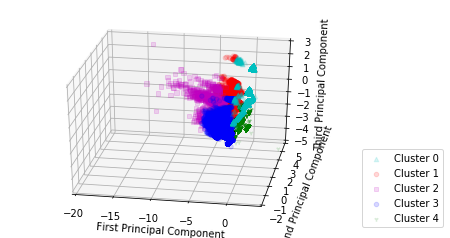

In [34]:
# project training data onto 3-D using principal components
# join with clusters labels
# plot
pca = H2OPrincipalComponentAnalysisEstimator(transform='standardize',seed=12345,k=3) # project onto 2 PCs
pca.train(x=X, training_frame=labeled_train_h2o)
features = pca.predict(labeled_train_h2o)
features_pandas = features.as_data_frame()
features_pandas['label'] = labeled_train_h2o[-1].as_data_frame()
print(features_pandas.head())
plot(features_pandas)

## Cluster centroids and with brief profiles

In [35]:
# profile clusters by means
grouped = labeled_train_h2o.group_by(by=['predict'])

In [36]:
means = grouped.mean(col=X).get_frame()

In [37]:
means

predict,mean_offervalue,mean_avg_category_quantity,mean_avg_category_amount,mean_exact_item_bought,mean_month,mean_week,mean_day
0,1.98868,0.0121355,0.0299874,0.0124084,0.722154,5.40432,22.5429
1,1.27502,1.31836,4.62313,0.996452,0.646387,5.39645,24.2474
2,1.12364,3.33443,10.3454,0.991833,0.853902,6.23593,23.1733
3,1.09815,0.939881,2.91457,0.719917,0.847232,4.17991,5.36753
4,0.787661,0.21914,0.543999,0.184691,0.10527,3.29234,25.8372


## Brief Profiles

Customers in Cluter 0 are provided with offers of the highest values and has spent only a little on items in the same category as the item for which they received as an offer in the trainHistory or testHistory sets, and also barely bought the same items. Shoppers in Cluster 1 and Cluster 2 spent a lot on items in the same category as the those of offers, and also most of them  have previously purchased the exact item on offer. Customers in Cluster 3 tend to receive the offer in the very beginning of the month. And Shoppers in Cluster 4 are provided with offers of the lowest values and tend to receive the offer in the end of the month.

## Bonus

This is the process of using Gap Statistic to obtain the optimal number of clusters. We tried different clusters until the error in the reference distribution ( randomly distributed) is the most different from the error in the training data. Because large gap indicate that the number of clusters is the most efficient. In our case, we expect the gap when number of 5 will be the largest.

In [38]:
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? Y
H2O session _sid_a567 closed.
